#**Getting started**

For this lab, start by setting up Miniconda, Mamba, and a conda environment. 

##**Install Miniconda.**

In [ ]:
%%bash
wget https://repo.anaconda.com/miniconda/Miniconda3-py39_4.10.3-Linux-x86_64.sh &>/dev/null
chmod u+x Miniconda3-py39_4.10.3-Linux-x86_64.sh
./Miniconda3-py39_4.10.3-Linux-x86_64.sh -b -f -p /usr/local &>/dev/null
rm Miniconda3-py39_4.10.3-Linux-x86_64.sh

Now, instead of updating Miniconda, we will install the package manager Mamba.

##**Install the package manager Mamba.**

Mamba is a reimplementation of Anaconda in the programming language C++ to speed up computation over Anaconda's Python code. In addition to enabling faster environment creation and package installation, Mamba can also bypass certain errors that would cause Anaconda to fail.


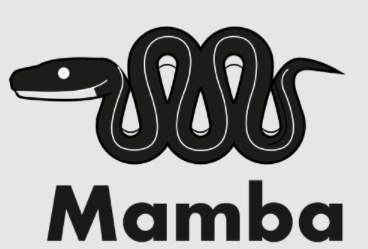

In [ ]:
%%bash
conda install -c conda-forge mamba --yes &>/dev/null

##**Create a conda environment called `lab11`.**

To use Mamba, we type the `mamba` command instead of `conda`. For most purposes, you can use `mamba` exactly like you would use `conda`.

In [ ]:
%%bash
mamba create --name lab11 --yes &>/dev/null

#**Transcript quantification with Salmon.**

With Mamba installed and a conda environment created, we are now ready to start using Salmon.

##**Install Salmon version 0.12.0.**

Here, we specifiy Salmon version 0.12.0 because other versions have trouble running within Colab notebooks.

In [ ]:
%%bash
source activate lab11
mamba install -c bioconda salmon=0.12.0 --yes

pkgs/main/noarch          
pkgs/r/noarch             
pkgs/r/linux-64           
pkgs/main/linux-64        
bioconda/noarch           
bioconda/linux-64         
Transaction

  Prefix: /usr/local/envs/lab11

  Updating specs:

   - salmon=0.12.0


  Package           Version  Build        Channel                  Size
─────────────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex       0.1  main         pkgs/main/linux-64     Cached
  + _openmp_mutex       4.5  1_gnu        pkgs/main/linux-64     Cached
  + bzip2             1.0.8  h7b6447c_0   pkgs/main/linux-64      78 KB
  + icu                58.2  he6710b0_3   pkgs/main/linux-64      11 MB
  + jemalloc          5.2.1  h2531618_5   pkgs/main/linux-64       1 MB
  + libboost         1.73.0  h3ff78a5_11  pkgs/main/linux-64      14 MB
  + libgcc-ng         9.3.0  h5101ec6_17  pkgs/main/linux-64     Cached
  + libgomp     

##**Verify whether Salmon will run.**

Take note of the subcommands listed within the help information.

In [ ]:
%%bash
source activate lab11
salmon

salmon v0.12.0

Usage:  salmon -h|--help or 
        salmon -v|--version or 
        salmon -c|--cite or 
        salmon [--no-version-check] <COMMAND> [-h | options]

Commands:
     index Create a salmon index
     quant Quantify a sample
     alevin single cell analysis
     swim  Perform super-secret operation
     quantmerge Merge multiple quantifications into a single file


Now that Salmon is installed, we need to download data to input into Salmon. 

##**Download a reference transcriptome.**

Here, we will use the genome of the model organism *Arabidopsis thaliana* as our reference. We have specficially chosen this genome since its small size fits well within Google Colaboratory's disk storage limit. 

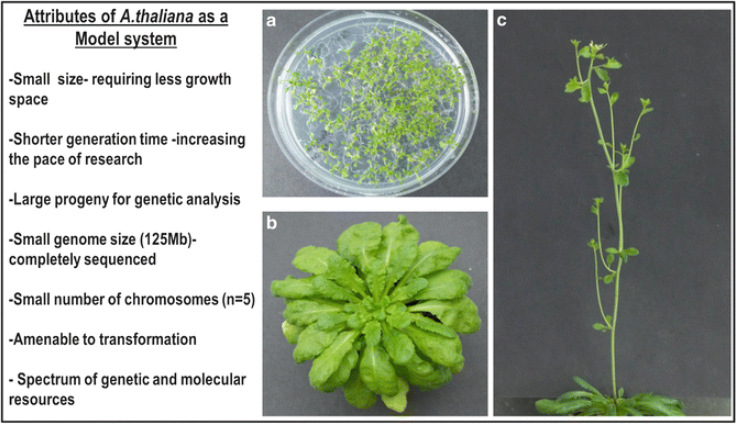

Here, we use the `curl` (short for "Client URL") command to download. You may think of it as similar to `wget`. 

In [ ]:
%%bash
curl ftp://ftp.ensemblgenomes.org/pub/plants/release-28/fasta/arabidopsis_thaliana/cdna/Arabidopsis_thaliana.TAIR10.28.cdna.all.fa.gz -o athal.fa.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.6M  100 18.6M    0     0  3426k      0  0:00:05  0:00:05 --:--:-- 4700k


##**Create an Salmon index.**

Similar to BWA in the last module, we must index the reference to facilitate later computation.

In [ ]:
%%bash
source activate lab11
salmon index -t athal.fa.gz -i athal_index

Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon


index ["athal_index"] did not previously exist  . . . creating it
[2022-02-02 16:42:23.375] [jLog] [info] building index
[2022-02-02 16:42:23.375] [jointLog] [info] [Step 1 of 4] : counting k-mers
[2022-02-02 16:42:23.394] [jointLog] [warning] Entry with header [ATMG00665.1], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
Elapsed time: 2.42992s

[2022-02-02 16:42:25.805] [jointLog] [warning] Removed 580 transcripts that were sequence duplicates of indexed transcripts.
[2022-02-02 16:42:25.805] [jointLog] [warning] If you wish to retain duplicate transcripts, please use the `--keepDuplicates` flag
[2022-02-02 16:42:25.805] [jointLog] [info] Replaced 698 non-ATCG nucleotides
[2022-02-02 16:42:25.805] [jointLog] [info] Clipped poly-A tails from 24 transcripts
[2022-02-02 16:42:25.808] [jointLog] [info] Building rank-select dictionary and saving to disk
[2022-02-02 16:42:25.815] [jointLog] [info] done
Elapsed time: 0.007267s
[2022-02-02 16:42:25.816] [jointLog]

Once complete, you should notice a `athal_index` directory was created that contains the Salmon index files.

##**Install SRA-tools.**

Now we need to obtain RNA-Seq reads to "pseudoalign" with the indexed reference transcriptome. The reads we will use have been selected from NCBI's Sequence Read Archive (SRA) and are also small enough to be used within Google Colaboratory.

When downloading files from SRA, it is best practice to use NCBI's command-line utility, SRA-tools. Specifically we will use the `fasterq-dump` command contained within the toolkit.

In [ ]:
%%bash
source activate lab11
mamba install -c bioconda sra-tools --yes

bioconda/linux-64        Using cache
bioconda/noarch          Using cache
pkgs/main/linux-64        
pkgs/r/linux-64           
pkgs/r/noarch             
pkgs/main/noarch          
Transaction

  Prefix: /usr/local/envs/lab11

  Updating specs:

   - sra-tools


  Package                           Version  Build            Channel                  Size
─────────────────────────────────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────────────────────────────────

  + libiconv                           1.15  h63c8f33_5       pkgs/main/linux-64     721 KB
  + libxml2                          2.9.12  h03d6c58_0       pkgs/main/linux-64       1 MB
  + ncbi-ngs-sdk                     2.10.4  hdf6179e_0       bioconda/linux-64      141 KB
  + perl                             5.26.2  h14c3975_0       pkgs/main/linux-64      10 MB
  + perl-app-cpanminus               1.7044  pl526_1          bioconda/linux

##**Confirm that SRA-tools was properly set up.**

In [ ]:
%%bash
source activate lab11
fasterq-dump --help


Usage:
  fasterq-dump <path> [options]

Options:
  -o|--outfile                     output-file 
  -O|--outdir                      output-dir 
  -b|--bufsize                     size of file-buffer dflt=1MB 
  -c|--curcache                    size of cursor-cache dflt=10MB 
  -m|--mem                         memory limit for sorting dflt=100MB 
  -t|--temp                        where to put temp. files dflt=curr dir 
  -e|--threads                     how many thread dflt=6 
  -p|--progress                    show progress 
  -x|--details                     print details 
  -s|--split-spot                  split spots into reads 
  -S|--split-files                 write reads into different files 
  -3|--split-3                     writes single reads in special file 
  --concatenate-reads              writes whole spots into one file 
  -Z|--stdout                      print output to stdout 
  -f|--force                       force to overwrite existing file(s) 
  -N|--rowid-as-n

At this point, we are ready to download our reads.

##**Download the RNA-Seq reads.**

The RNA-Seq reads we will download come from an experiment investigating the effect of cyclic AMP (cAMP) on the *Arabidopsis thaliana* stress response. For more details, see their study of origin here:

https://www.biorxiv.org/content/10.1101/2021.07.12.452129v2.full


Additionally, note that since each FASTQ file is approximately 400MB, it will take a long time to download the minimum number of files for Differential Expression Analysis (3 treatment, 3 control).

###**Control**

In [ ]:
%%bash
source activate lab11
fasterq-dump SRR16243477	

spots read      : 15,525,581
reads read      : 15,525,581
reads written   : 15,525,581


In [ ]:
%%bash
source activate lab11
fasterq-dump SRR16243498

spots read      : 15,957,854
reads read      : 15,957,854
reads written   : 15,957,854


In [ ]:
%%bash
source activate lab11
fasterq-dump	SRR16243497	

spots read      : 15,829,063
reads read      : 15,829,063
reads written   : 15,829,063


###**Treatment**

In [ ]:
%%bash
source activate lab11
fasterq-dump SRR16243483

spots read      : 17,167,568
reads read      : 17,167,568
reads written   : 17,167,568


In [ ]:
%%bash
source activate lab11
fasterq-dump SRR16243482

spots read      : 16,170,194
reads read      : 16,170,194
reads written   : 16,170,194


In [ ]:
%%bash
source activate lab11
fasterq-dump SRR16243481	

spots read      : 14,164,345
reads read      : 14,164,345
reads written   : 14,164,345


At this point, it would be best practice to peform several Quality Control steps to assure the quality of our downstream analyses. However, for brevity's sake, we will skip this.

##**Quantify transcript expression with `salmon quant`.**

Here we run `salmon quant` to quantify transcript expression for each FASTQ file. To reduce the amount of code written, we use a `for` loop to run the quantification on each FASTQ file. 

In [ ]:
%%bash
source activate lab11
for file in *.fastq; do
    FILENAME="$(basename -- $file)"
    ID="${FILENAME%%.*}"
    echo "Processing sample $ID"
    salmon quant -i athal_index -l A -r $file --validateMappings --quiet -o "quants/$ID"
done

Processing sample SRR16243477
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Processing sample SRR16243481
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Processing sample SRR16243482
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Processing sample SRR16243483
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Processing sample SRR16243497
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Processing sample SRR16243498
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://com

At this point, we have obtained `quant.sf` files for each FASTQ file and are ready to repeat the steps from the previous Differential Expression Analysis lab assignments.

#**Differential Expression Analysis**

##**R Setup and initial package installation.**

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager", quiet = TRUE)

In [ ]:
%%R
BiocManager::install("tximeta", quiet = TRUE, ask = FALSE)
library(tximeta)

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


R[write to console]: Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

R[write to console]: Installing package(s) 'BiocVersion', 'tximeta'

R[write to console]: also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘sass’, ‘rjson’, ‘futile.logger’, ‘snow’, ‘BH’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘htmlwidgets’, ‘crosstalk’, ‘matrixStats’, ‘zlibbioc’, ‘plogr’, ‘png’, ‘bitops’, ‘XML’, ‘GenomicAlignments’, ‘restfulr’, ‘lazyeval’, ‘BiocParallel’, ‘Rhtslib’, ‘shiny’, ‘DT’, ‘MatrixGenerics’, ‘Biobase’, ‘BiocGenerics’, ‘DelayedArray’, ‘XVector’, ‘RSQLite’, ‘KEGGREST’, ‘RCurl’, ‘BiocIO’, ‘rtracklayer’, ‘biomaRt’, ‘AnnotationFilter’, ‘Rsamtools’, ‘ProtGenerics’, ‘filelock’, ‘interactiveDisplayBase’, ‘GenomeInfoDbData’, ‘Summarized

In [ ]:
%%R
BiocManager::install("DESeq2", quiet = TRUE, ask = FALSE)
library(DESeq2)

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


R[write to console]: Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

R[write to console]: Installing package(s) 'DESeq2'

R[write to console]: also installing the dependencies 'annotate', 'genefilter', 'locfit', 'geneplotter', 'RcppArmadillo'


R[write to console]: Loading required package: S4Vectors

R[write to console]: Loading required package: stats4

R[write to console]: Loading required package: BiocGenerics

R[write to console]: 
Attaching package: 'BiocGenerics'


R[write to console]: The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get

##**Create a metadta R data.frame to label the RNA-Seq `quant.sf` files.**

In [ ]:
%%R
sample_names <-c("SRR16243477","SRR16243498","SRR16243497","SRR16243483","SRR16243482","SRR16243481")
sample_type <- c("Control","Control","Control","Treatment","Treatment","Treatment")
metadata <- data.frame(ids=sample_names, category=sample_type, stringsAsFactors=FALSE)
metadata

##**Save the absolute path of every `quant.sf` file in a variable called `files`.**

In [ ]:
%%R
files <- paste("/content/quants/", metadata$ids, "/quant.sf", sep="")
files

[1] "/content/quants/SRR16243477/quant.sf"
[2] "/content/quants/SRR16243498/quant.sf"
[3] "/content/quants/SRR16243497/quant.sf"
[4] "/content/quants/SRR16243483/quant.sf"
[5] "/content/quants/SRR16243482/quant.sf"
[6] "/content/quants/SRR16243481/quant.sf"


##**Create an R data.frame containing the above absolute paths, SRA Run IDs, and treatment status.**

In [ ]:
%%R
coldata <- data.frame(files, names=metadata$ids, condition=metadata$category, stringsAsFactors=FALSE)
coldata

                                 files       names condition
1 /content/quants/SRR16243477/quant.sf SRR16243477   Control
2 /content/quants/SRR16243498/quant.sf SRR16243498   Control
3 /content/quants/SRR16243497/quant.sf SRR16243497   Control
4 /content/quants/SRR16243483/quant.sf SRR16243483 Treatment
5 /content/quants/SRR16243482/quant.sf SRR16243482 Treatment
6 /content/quants/SRR16243481/quant.sf SRR16243481 Treatment


##**Use `tximeta`'s core function to convert transcript-level abundances to count matrices and download additional metadata for the `quant.sf` files.**

In [ ]:
%%R
summarizedExperiment <- tximeta(coldata, type="salmon", txOut=TRUE)

R[write to console]: importing quantifications

R[write to console]: reading in files with read_tsv

R[write to console]: 1 
R[write to console]: 2 
R[write to console]: 3 
R[write to console]: 4 
R[write to console]: 5 
R[write to console]: 6 
R[write to console]: 




tximeta needs a BiocFileCache directory to access and save TxDb objects.
Do you wish to use the default directory: '/root/.cache/R/BiocFileCache'?
If not, a temporary directory that is specific to this R session will be used.

You can always change this directory later by running: setTximetaBFC()
Or enter [0] to exit and set this directory manually now.
This location can also be set by environmental variable TXIMETA_HUB_CACHE. 

1: Yes (use default)
2: No (use temp)



R[write to console]: couldn't find matching transcriptome, returning non-ranged SummarizedExperiment



Selection: 1


##**Import `summarizedExperiment` into DESeq2 with the DESeqDataSet() function.**

In [ ]:
%%R
dds <- DESeqDataSet(summarizedExperiment, design = ~ condition)

##**Run DESeq2's core function on the DESeqDataSet named `dds`.**

In [ ]:
%%R
dds <- DESeq(dds)

##**Use the `results()` function to extract a results table from the DESeqDataSet.**

In [ ]:
%%R
resultsTable <- results(dds, tidy=TRUE)
head(resultsTable)

##**Download and install the `EnhancedVolcano` package.**

In [ ]:
%%R
devtools::install_github('kevinblighe/EnhancedVolcano', quiet = TRUE)
library(EnhancedVolcano)

##**Use `EnhancedVolcano`'s core function to make a volcano plot**

In [ ]:
%%R
pdf("volcanoPlot.pdf", width = 9, height = 9)
EnhancedVolcano(resultsTable, x = 'log2FoldChange', y = 'pvalue', pCutoff = 10e-6, FCcutoff = 1,  pointSize = 1, title = 'Treatment vs. Control', lab = resultsTable$row, labSize = 3.0,  parseLabels = TRUE, drawConnectors = TRUE, widthConnectors = 0.2)

##**Use the `vst()` function to convert the DESeqDataSet into a DESeqTransform data structure.**

In [ ]:
%%R
dst <- vst(dds, blind=FALSE)
head(assay(dst))

##**Use the `plotPCA` function to make a PCA plot.**

In [ ]:
%%R
#pdf("PCA.pdf", width = 7, height = 5)
plotPCA(dst, intgroup="condition")

##**Install additional packages.**

In [ ]:
%%R
install.packages("genefilter",  quiet = TRUE)
library( "genefilter" )

install.packages('gplots',  quiet = TRUE)
library( "gplots" )

install.packages('RColorBrewer',  quiet = TRUE)
library( "RColorBrewer" )

##**Select the a certain number of genes with the highest variance between samples.** 

In [ ]:
%%R
topVarGenes <- head( order( rowVars( assay(dst) ), decreasing=TRUE ), 50 )

##**Use the `heatmap.2()` function to plot an expression-level heatmap with hierarchical clustering of the samples.**

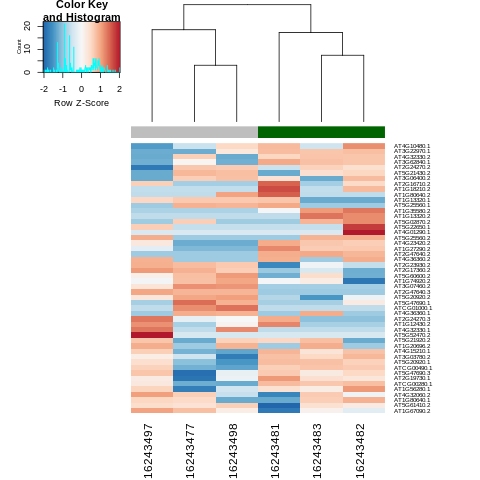

In [ ]:
%%R
#pdf("heatmap.pdf", width = 7, height = 6)
heatmap.2( assay(dst)[ topVarGenes, ], scale="row", 
     trace="none", dendrogram="column", margins = c(7, 10),
     col = colorRampPalette( rev(brewer.pal(9, "RdBu")) )(255),
     ColSideColors = c( Control="gray", DPN="darkgreen", OHT="orange" )
     [ colData(dst)$condition ], )

#**Lab 11 Assignment: From FASTQ to differential expression**

##**Instructions**


In your own Google Colab notebook, use the commands presented in the tutorial section as guidelines to run the differential expression pipeline on your own reference transcriptome and RNA-Seq reads. 

You will be graded based on whether you can successfully produce all three differential expresion visualizations (volcano plot, PCA, and heatmap). Once done, please submit your Colab notebook.

##**Hints**

###**Finding a reference transcriptome.**

One place to obtain transcriptome data is the UCSC Genome Browser FTP server.

https://hgdownload.soe.ucsc.edu/downloads.html

On this webpage, select your organism of choice and click either `Annotations` then `Fileserver (bigBef, maf, fa, etc) annotations` OR `Genome sequence files and select annotations (2bit, GTF, GC-conntent,etc)` then `Standard genom sequence files and select annotations (2bit, GTF, GC-conntent,etc)`. 

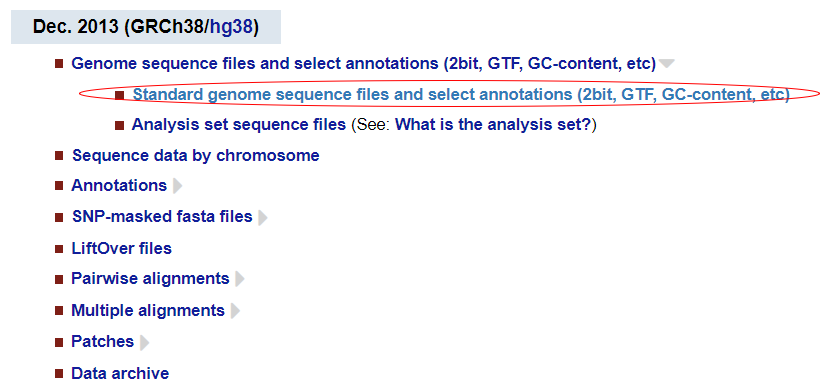

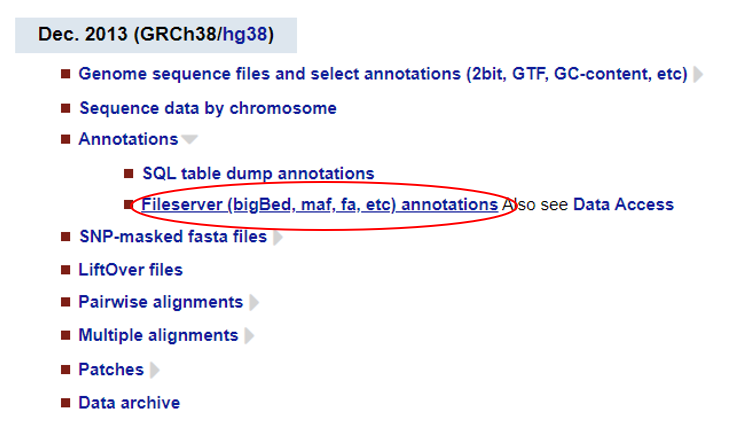

The transcriptome files you should look for will be labeled `mrna.fa.gz`, `refMrna.fa.gz`, `seqNcbiRefSeq.rna.fa`, or something similar.

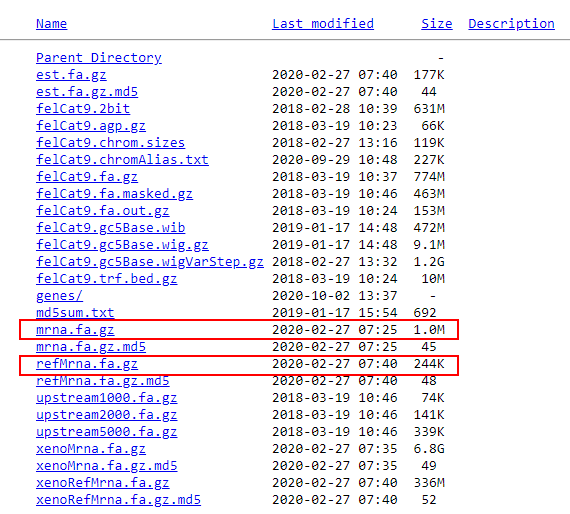

From here, right-click the file you want to get a link for then click `Copy link address` to save the link to your copy-paste clipboard.

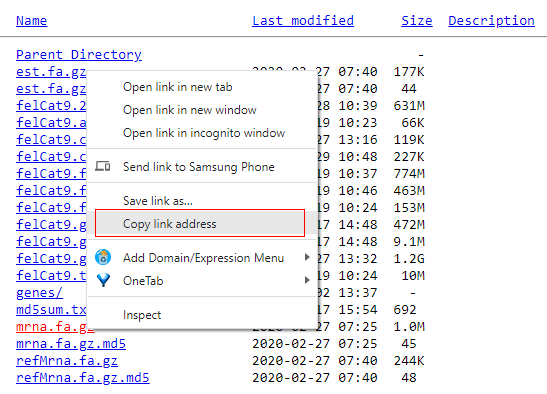

###**Finding RNA-Seq reads for your reference.**

To help search for RNA-Seq data on [NCBI's SRA](https://www.ncbi.nlm.nih.gov/sra), use the following search format:

`*Genus species* AND "transcriptomic"[Source] AND "rna seq"[Strategy] control`

The word "control" is added at the end to help filter for sequences from studies that have a clear Treatment and Control. 

Additionally, I recommend searching for RNA-Seq files that are **no larger than 500MB each**. You can check the size of each entry by looking for the text circled in red.

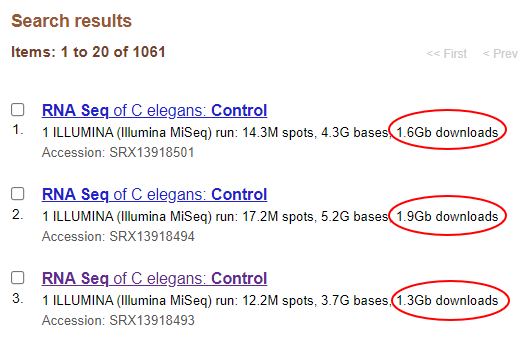

Then, once you have found a promising entry, you can open its page. It should looks as follows with the Run ID at the bottom of the page.

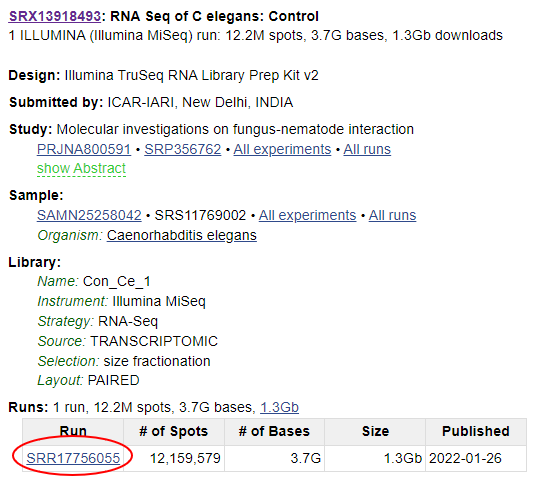

To find other RNA-Seq libraries from the same study, click on `Study > All runs`.

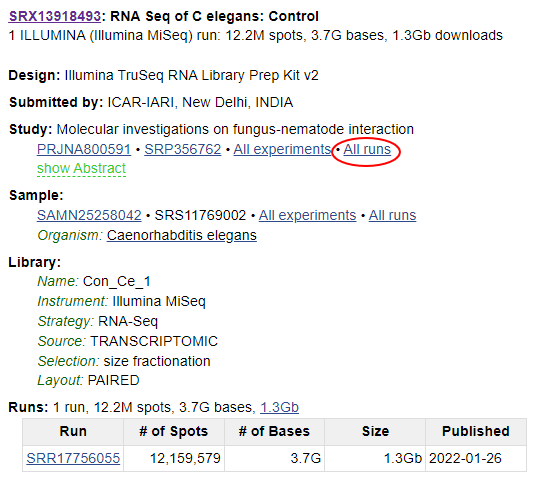

Doing so will open up a table showing other samples in the study, their Run accessions, and usually, information classifying them as "Treatment"/"Mutant" or "Control"/"Wild type" like below.

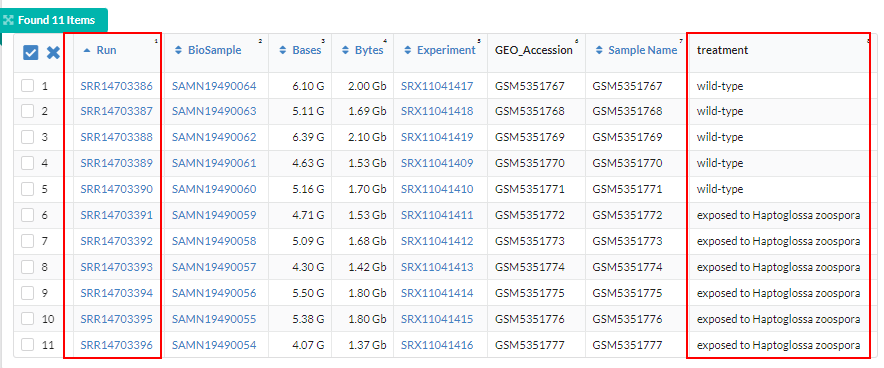

From here, select at least 3 control samples and 3 treatment samples for use in the Differential Expression Analysis pipeline.